# Python Classification

In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'


In [31]:
# Importing the necessary libraries for this project
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

All the necessary libraries for this project have been imported

In [3]:
# Let us now load the loan dataset that is required for the assignment using the wget command
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-11-04 13:59:01--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

     0K .......... .......... ..                              100% 86.7K=0.3s

2022-11-04 13:59:03 (86.7 KB/s) - 'loan_train.csv' saved [23101/23101]



In [4]:
# Let us now read the loaded csv file to know its contents. The first ten set of data are displayed in the dataset
df_loan_train=pd.read_csv("loan_train.csv")
df_loan_train.head(10)

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


After loading the loan train dataset, it contains the columns Unnamed 01, Unnamed 0, loan status, principal, terms, effective date, due date, age, education and Gender

In [5]:
# Retrieving the shape of the loan train
df_loan_train.shape

(346, 10)

There are 346 dataset from the rows

In [6]:
# Converting effective date and due date to datetime objects
df_loan_train['due_date'] = pd.to_datetime(df_loan_train['due_date'])
df_loan_train['effective_date'] = pd.to_datetime(df_loan_train['effective_date'])
df_loan_train.head(10)

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male


As it can be seen, the effective date and due date have all been converted to datatime objects with the hyphenated separations

In [7]:
# Getting the values of those who have paid off and the other loan status as it as not been clearly displayed earlier
df_loan_train['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

So the other value is COLLECTION. Since the rows are 346, 260 PAID OFF and 86 COLLECTION means there are two value counts for loan status and their corresponding values are the 260 and 86.

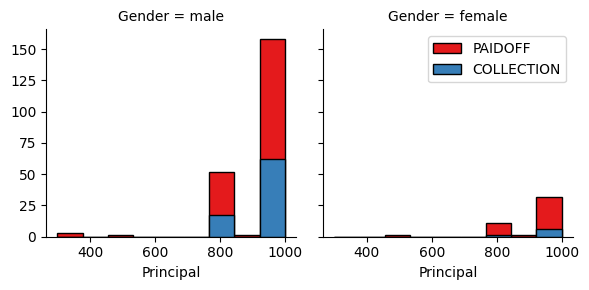

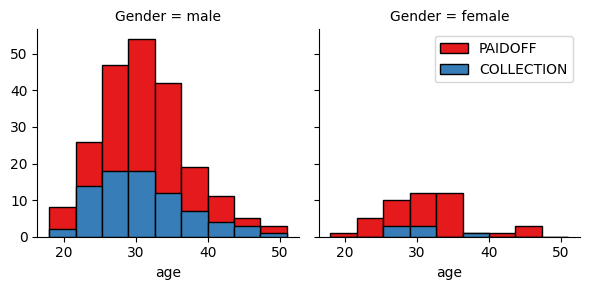

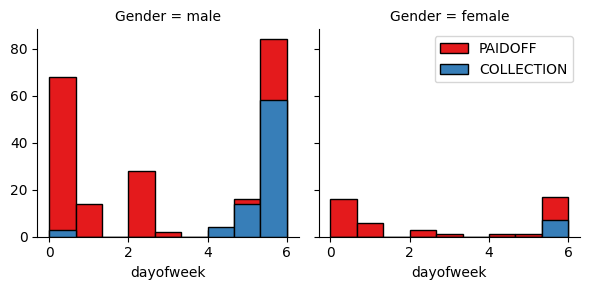

In [8]:
# For very effective visualization, seaborn can be used to make some plots for analysis

#1st plot analysis is done with principal with respect to the gender of the person and the loan status was considered too
min_Principal=df_loan_train.Principal.min()
max_Principal=df_loan_train.Principal.max()
bins = np.linspace(min_Principal,max_Principal , 10)
facet_grid = sns.FacetGrid(df_loan_train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
facet_grid.map(plt.hist, 'Principal', bins=bins, ec="k")

facet_grid.axes[-1].legend()
plt.show()

# 2nd plot analysis is done with age with respect to the gender of the person and the loan status was considered too
min_age=df_loan_train.age.min()
max_age=df_loan_train.age.max()
bins2 = np.linspace(min_age, max_age, 10)
facet_grid2 = sns.FacetGrid(df_loan_train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
facet_grid2.map(plt.hist, 'age', bins=bins2, ec="k")

facet_grid2.axes[-1].legend()
plt.show()

# This is the 3rd plot visualizing the day of the week people get a loan. Gender and loan status considered again
df_loan_train['dayofweek'] = df_loan_train['effective_date'].dt.dayofweek
min_dayofweek=df_loan_train.dayofweek.min()
max_dayofweek=df_loan_train.dayofweek.max()
bins3 = np.linspace(min_dayofweek, max_dayofweek, 10)
facet_grid3 = sns.FacetGrid(df_loan_train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
facet_grid3.map(plt.hist, 'dayofweek', bins=bins3, ec="k")
facet_grid3.axes[-1].legend()
plt.show()

We see that people who get the loan very late in the week dont pay it off
A minimum of day 5 hence can be set by applying lamba using Feature Binarization.The rest will also be set to zero in this instance

In [9]:
# Using feature binarization to apply lambda to minimum of day 5
df_loan_train['lateInWeek'] = df_loan_train['dayofweek'].apply(lambda x: 1 if (x>4)  else 0)
df_loan_train.head(10)

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,lateInWeek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,0
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male,4,0
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male,4,0
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male,5,1
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male,5,1
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male,5,1


In [10]:
# Converting the gender binary parameters (male and female) to 0s and 1s
df_loan_train['Gender'].replace(to_replace=['female','male'], value=[1,0],inplace=True)
df_loan_train.head()


,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,lateInWeek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,0


As clearly seen above, all males are converted to 0s and females to 1s

In [11]:
# Applying one hot encoding technique to convert categorical varables to binary variables and appending them to the bin_feat Data Frame
bin_feat = df_loan_train[['Principal','terms','age','Gender','lateInWeek']]
bin_feat = pd.concat([bin_feat,pd.get_dummies(df_loan_train['education'])], axis=1)
bin_feat.drop(['Master or Above'], axis = 1,inplace=True)
bin_feat.head(10)

,Principal,terms,age,Gender,lateInWeek,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,0,0,0,1
4,1000,30,29,0,0,0,0,1
5,1000,30,36,0,0,0,0,1
6,1000,30,28,0,0,0,0,1
7,800,15,26,0,1,0,0,1
8,300,7,29,0,1,0,0,1
9,1000,15,39,0,1,0,1,0


As shown above, some of the columns containing binary variables have been converted to zeros and ones to make analysis easier

In [12]:
# Storing bin_feat sets as 1
X = bin_feat
X[:]

,Principal,terms,age,Gender,lateInWeek,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,0,0,0,1
4,1000,30,29,0,0,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,0,1,0
342,1000,30,25,0,1,0,1,0
343,800,15,39,0,0,0,0,1
344,1000,30,28,0,0,0,0,1


These bin_feat are the features and those are the independent variables

In [13]:
# Storing the label which is loan status as y. 
y = df_loan_train['loan_status'].values
y[:]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

Clearly the y is the dependent variable

Normalizing the data to a mean of zero and a standard deviation of 1 using the fit transform


In [14]:
# Normalization of the dataset
X= preprocessing.StandardScaler().fit(X).transform(X)
X[:]

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

Building classifiers using the following algorithms: 
K Nearest Neighbor(KNN)
Decision Tree
Support Vector Machine
Logistic Regression

# K Nearest Neighbour

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('The train set is:', X_train.shape,  y_train.shape)
print ('The test set is:', X_test.shape,  y_test.shape)

The train set is: (242, 8) (242,)
The test set is: (104, 8) (104,)


As clearly seen, 30% of the data will be used for testing and 70% for prediction

In [17]:
k = 7

k7Neighbor = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
k7Neighbor
 
y_predict = k7Neighbor.predict(X_test)
y_predict[0:6]

print("The train set accuracy using KNN is : ", metrics.accuracy_score(y_train, k7Neighbor.predict(X_train)))
print("The test set accuracy using KNN is : ", metrics.accuracy_score(y_test, y_predict))

The train set accuracy using KNN is :  0.8016528925619835
The test set accuracy using KNN is :  0.7403846153846154


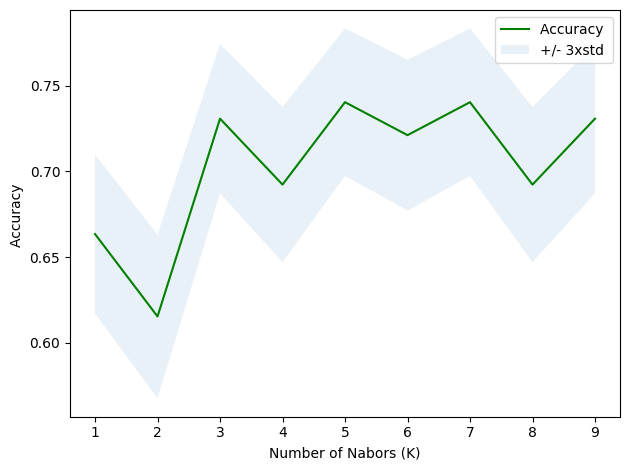

Best accuracy: 0.7403846153846154 k= 5


In [18]:
p = 10
mean_acc = np.zeros((p-1))
std_acc = np.zeros((p-1))

ConfustionMx = [];
for n in range(1,p):
    
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_predict=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_predict)

    
    std_acc[n-1]=np.std(y_predict==y_test)/np.sqrt(y_predict.shape[0])

plt.plot(range(1,p),mean_acc,'g')
plt.fill_between(range(1,p),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "Best accuracy:", mean_acc.max(), "k=", mean_acc.argmax()+1)

# Decision Tree  

In [19]:
X_trained, X_tested, y_trained, y_tested = train_test_split(X, y, test_size=0.3, random_state=3)
Decision_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Decision_Tree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [20]:
# Fitting our model against the trained data set
Decision_Tree.fit(X_trained,y_trained)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF']
The accuracy is :  0.7019230769230769


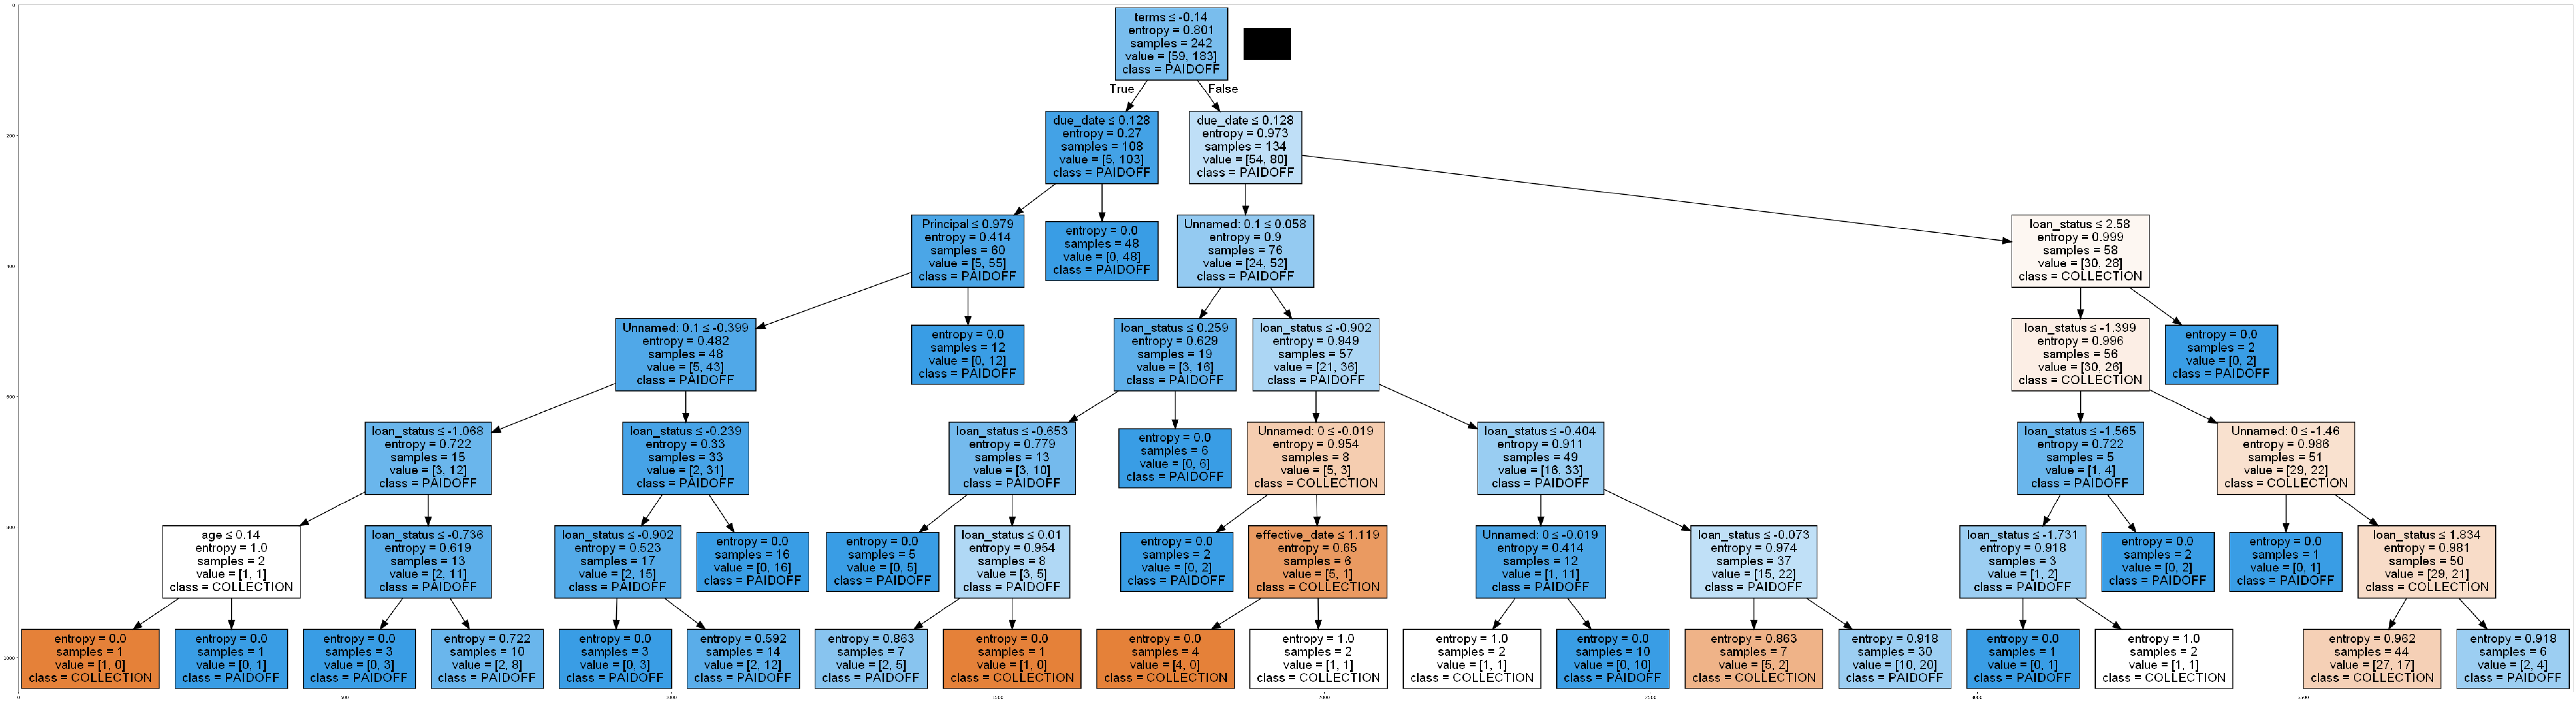

In [21]:
prediction_Tree = Decision_Tree.predict(X_tested)
print (prediction_Tree [0:7])
print (y_tested [0:7])


print("The accuracy is : ", metrics.accuracy_score(y_tested, prediction_Tree))

StringIO_dot = StringIO()
filename = "loan.png"
featureNames = df_loan_train.columns[0:8]
targetNames = df_loan_train['loan_status'].unique().tolist()
output=tree.export_graphviz(Decision_Tree,feature_names=featureNames, out_file=StringIO_dot, class_names= np.unique(y_trained), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(StringIO_dot.getvalue())  
graph.write_png(filename)
image = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(image,interpolation='nearest')

# Support Vector Machine (SVM)

In [24]:
df_loan_train.dtypes
df_loan_train = df_loan_train[pd.to_numeric(df_loan_train['education'], errors='coerce').notnull()]
df_loan_train['education'] = df_loan_train['education'].astype('int')
df_loan_train.dtypes

classifier = svm.SVC(kernel='rbf')
print(classifier.fit(X_train, y_train))

y_predictor = classifier.predict(X_test)
y_predictor [0:6]

SVC()


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

              precision    recall  f1-score   support

  COLLECTION       0.22      0.13      0.17        15
     PAIDOFF       0.79      0.87      0.83        55

    accuracy                           0.71        70
   macro avg       0.50      0.50      0.50        70
weighted avg       0.67      0.71      0.69        70

0.685960591133005
[0.09 0.71]


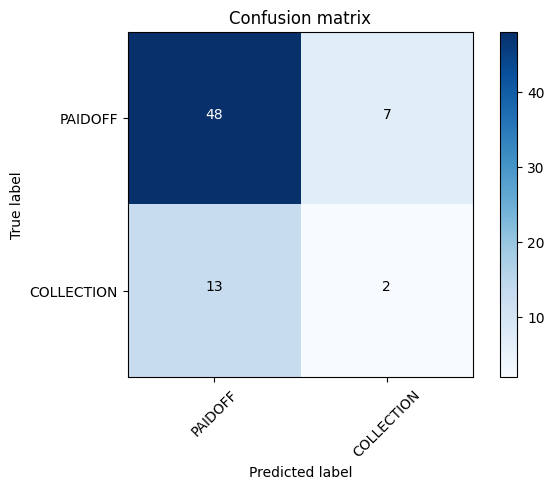

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick = np.arange(len(classes))
    plt.xticks(tick, classes, rotation=45)
    plt.yticks(tick, classes)

    formater = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], formater),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(y_test, y_predictor, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predictor))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')


print(f1_score(y_test, y_predictor,average="weighted",labels=np.unique(y_predictor)))
print(jaccard_score(y_test,y_predictor,average=None))




# Logistic Regression

In [50]:
df_loan_train = df_loan_train[['loan_status', 'Principal', 'terms', 'effective_date', 'due_date', 'age', 'education', 'Gender']]
df_loan_train['loan_status'] = df_loan_train['loan_status'].astype('int')


X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



LogR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LogR

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


LogisticRegression(C=0.01, solver='liblinear')

In [52]:
y_predictor = LogR.predict(X_test)
print(y_predictor)
y_prob = LogR.predict_proba(X_test)
print(y_prob)

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
[[0.5  0.5 ]
 [0.45 0.55]
 [0.32 0.68]
 [0.36 0.64]
 [0.33 0.67]
 [0.33 0.67]
 [0.48 0.52]
 [0.47 0.53]
 [0.36 0.64]
 [0.49 0.51]
 [0.35 0.65]
 [0.5  0.5 ]
 [0.26 0.74]
 [0.35 0.65]
 [0.43 0.57]
 [0.27 0.73]
 [0.52 0.48]
 [0.32 0.68]
 [0.35 0.65]
 [0.33 0.67]
 

In [54]:



log_loss(y_test, y_prob)


0.5779683654623735

# Evaluating our Model using Test Set


In [55]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-11-04 15:04:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

     0K ...                                                   100%  755M=0s

2022-11-04 15:04:07 (755 MB/s) - 'loan_test.csv' saved [3642/3642]



In [56]:
test_loan_train = pd.read_csv('loan_test.csv')
test_loan_train.head(10)

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
5,37,37,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male
6,38,38,PAIDOFF,1000,15,9/11/2016,9/25/2016,24,college,male
7,48,48,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male
8,50,50,PAIDOFF,800,15,9/11/2016,9/25/2016,27,college,female
9,61,61,PAIDOFF,1000,15,9/11/2016,9/25/2016,37,college,male


In [58]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
Y = test_loan_train['loan_status'].values
Y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [71]:
yhatKNN=neigh.predict(X)
KNNJaccard = jaccard_score(y, yhatKNN, average=None)
KNNF1 = f1_score(y, yhatKNN, average='weighted')
print("Avg F1-score: %.2f" % KNNF1 )
print(str(KNNJaccard)+" is Jaccard score for KNN")


yhatDEC = Decision_Tree.predict(X)
DTJaccard = jaccard_score(y, yhatDEC, average=None)
DTF1 = f1_score(y, yhatDEC, average='weighted')
print("Avg F1-score: %.2f" % DTF1 )
print(str(DTJaccard)+" is Jaccard score for Tree")

yhatSVM=classifier.predict(X)
SVMJaccard = jaccard_score(y, yhatSVM, average=None)
SVMF1 = f1_score(y, yhatSVM, average='weighted')
print("Avg F1-score : %.2f" % SVMF1)
print(str(SVMJaccard)+" is Jaccard score for SVM")

yhatLOG = LogR.predict(X)
yhatLOGproba = LogR.predict_proba(X)
LogRJaccard = jaccard_score(y, yhatLOG, average=None)
LogRF1 = f1_score(y, yhatLOG, average='weighted')
Logloss = log_loss(y, yhatLOGproba)
print("LogLoss: : %.2f" % Logloss)
print("Avg F1-score: %.4f" % LogRF1)
print(str(LogRJaccard)+" is Jaccard Score for LOG" )

Avg F1-score: 0.75
[0.26 0.74] is Jaccard score for KNN
Avg F1-score: 0.80
[0.42 0.76] is Jaccard score for Tree
Avg F1-score : 0.64
[0.   0.75] is Jaccard score for SVM
LogLoss: : 0.56
Avg F1-score: 0.7228
[0.21 0.74] is Jaccard Score for LOG
